This notebook refers to the manuscript "Bose-Einstein statistics for a finite number of particles".

Here you can see the code that generates figure 4 and 6.

The main result is to calculate $z(N)$, which is the minimum of $\frac{1}{k_B^2  \beta} \left(\frac{\partial{c}_v}{\partial{T}}\right)_{N,\kappa}$, numerically. The minimum argument, $\beta^*$ leads to 

$$ \gamma^* = \frac{\beta^* - \beta_c}{\beta_c} \quad \text{and} \quad \lambda_2^* = - \log (\xi(\beta^*,N)) $$.
This notebook also gives the numerical values of the variables  $ \bar{\gamma},\bar{\lambda}_2, a,b,\bar{q},r_m, \bar{r},z_m$, and $\bar{z}$ defined in appendix C.


In [1]:
from IGQG import *
import numpy as np
mp.dps = 50
eta = power(2,-1) 

from matplotlib import pyplot as plt

In [2]:
def dxidb(xiarray,beta):
    num = gamma(eta+2)*(beta**(-eta-2))*fpolylog(eta+1,xiarray)
    den = gamma(eta+1)*(beta**(-eta-1))*fpolylog(eta,xiarray)/xiarray + (1-xiarray)**-2
    return num/den

def d2xidb2(xiarray,beta):
    fd = dxidb(xiarray,beta)
    numt1 = gamma(eta+3)*(beta**(-eta-3))*fpolylog(eta+1,xiarray)
    numt2 = -fd*2*gamma(eta+2)*(beta**(-eta-2))*fpolylog(eta,xiarray)/xiarray
    numt3 = (fd**2)*(gamma(eta+1)*(beta**(-eta-1))*(fpolylog(eta-1,xiarray)-fpolylog(eta,xiarray))*xiarray**(-2) 
                    +2*(1-xiarray)**(-3))
    den = gamma(eta+1)*(beta**(-eta-1))*fpolylog(eta,xiarray)/xiarray + (1-xiarray)**(-2)
    return -(numt1+numt2+numt3)/den

def dcvdtob(xiarray,beta,N):
    fd = dxidb(xiarray,beta)
    fd2 = d2xidb2(xiarray,beta)
    t1 = -(eta+2)*(eta+1)*fpolylog(eta+2,xiarray)
    t2 = fd*(beta/xiarray)*2*(eta+1)*fpolylog(eta+1,xiarray)
    t3 = -((fd*(beta/xiarray))**2)*(fpolylog(eta,xiarray)-fpolylog(eta+1,xiarray))
    t4 = -(fd2*beta*beta/xiarray)*fpolylog(eta+1,xiarray)
    dcvob = gamma(eta+2)*beta**(-eta-2)*(t1+t2+t3+t4)
    return -beta*dcvob/N  

<b> Finding the minimum values numerically </b>

In [3]:
def estimatemin(N,guess):
    brcentral,brunc = guess,1-guess
    while(brunc>(1-brcentral)*1e-10):#1e-10
        #print(brcentral)
        step = power(2,-1)
        
        betaratio = brcentral+brunc*np.arange(-1,1.1,step)#.1
        betacritical = power(gamma(eta+1)*(1/N)*zeta(eta+1),1/(eta+1))
        beta = betacritical*betaratio
        xiarray=xi(beta,eta,N)
        
        Z = dcvdtob(xiarray,beta,N)
        brcentral,brunc = betaratio[np.argmin(Z)],brunc*step*1.1
        l2 = -mp.log(xiarray[np.argmin(Z)])
    return brcentral,l2,np.min(Z),float(brunc)

In [4]:
x,y,z=[],[],[]

ns = [power(10,i) for i in 2+(np.arange(0,7,1/3))]
guess = .6

for N in ns:
    br,yy,zz,unc = estimatemin(N,guess)
    x.append(br-1)
    y.append(yy)
    z.append(zz)
    guess=br #only works if increasing N
x,y,z = np.array(x),np.array(y),np.array(z)

Obtaining $\bar{\lambda_2}$ and $\bar{\gamma}$

In [5]:
barl2 = (1/6*gamma(5/2)/zeta(3/2))**(-2/3)
barg = (2/3)*(barl2**(-1)-2*gamma(1/2)/zeta(3/2)*barl2**(1/2))
barl2,barg

(5.1804452127771410354356285061077186821426119776135,
 -1.9303360211851720750923382924652902596070536787471)

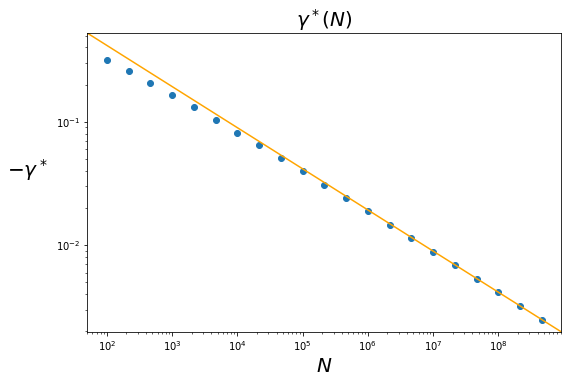

In [6]:
xaxis = np.array([ns[0]/2]+ns+[2*ns[-1]]).astype(float)

fig,ax = plt.subplots(figsize=(8.5,5.5))

xpredict = barg*xaxis**(-1/3)

ax.scatter(ns,-x.astype(np.float64))
ax.plot(xaxis,-xpredict,color='orange')
ax.set_yscale('log')
ax.set_xscale('log')

ax.set_xlabel(r'$N$',size=20)
ax.set_ylabel(r'$-\gamma^*$        ',size=20,rotation=0)

ax.set_xlim(float(xaxis[0]), float(xaxis[-1]))
ax.set_ylim(float(-xpredict[-1]), float(-xpredict[0]))

ax.set_title(r'$\gamma^*(N)$'.format(eta), fontsize=20)
plt.savefig('scaling_g.png'.format(eta), bbox_inches = "tight",dpi=600)

plt.show()

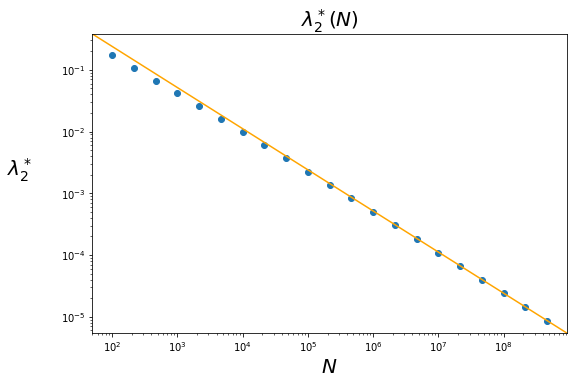

In [7]:
fig,ax = plt.subplots(figsize=(8.5,5.5))

ypredict = barl2*xaxis**(-2/3)

ax.scatter(ns,y.astype(np.float64))
ax.plot(xaxis,ypredict,color='orange')
ax.set_yscale('log')
ax.set_xscale('log')

ax.set_xlabel(r'$N$',size=20)
ax.set_ylabel(r'$\lambda_2^*$            ',size=20,rotation=0)

ax.set_xlim(float(xaxis[0]), float(xaxis[-1]))
ax.set_ylim(float(ypredict[-1]), float(ypredict[0]))

ax.set_title(r'$\lambda_2^*(N)$'.format(eta), fontsize=20)
plt.savefig('scaling_l2.png'.format(eta), bbox_inches = "tight",dpi=600)

plt.show()

Obtaining $a,b,\bar{q},r_m,\bar{r}$

In [8]:
a = gamma(1/2)/zeta(3/2)*barl2**(-1/2)+barl2**(-2)
b = (- 1.5*barg*gamma(1/2)*barl2**(-1/2)/zeta(3/2) + zeta(1/2)/zeta(3/2))/a

a,b

(0.33535774392165016971274284882984196608416324413892,
 0.90686281147021641208106565848005452532659384448244)

In [9]:
barq = (3/2)/a
barq

4.472835433764266666638419769909497578628403332052

In [10]:
dl2dg = -(3/2)*(barl2**(-2) + gamma(1/2)/zeta(3/2)*barl2**(-1/2))**(-1)
dl2dg

-4.472835433764266666638419769909497578628403332052

In [11]:
rmin = -(9/2)*a**(-3)*barl2**(-3)-(3/2)*gamma(5/2)*a**(-3)*barl2**(-3/2)/zeta(3/2)
rmin

-2.5745865455982293830331971347428387375552541804265

In [12]:
barr = (-(15/4)*a**(-1)
        +(9/2)*gamma(1/2)*a**(-2)*barl2**(-1/2)/zeta(3/2)
        +(9/2)*b*gamma(5/2)*a**(-3)*barl2**(-3/2)/zeta(3/2)
        +(27/2)*b*a**(-3)*barl2**(-3)
        +(39/4)*barg*gamma(5/2)*a**(-3)*barl2**(-3/2)/zeta(3/2)
        +(45/2)*barg*a**(-3)*barl2**(-3)
        -9*gamma(-1/2)*a**(-3)*barl2**(-5/2)/zeta(3/2)
        -3*gamma(-1/2)*gamma(5/2)*a**(-3)*barl2**(-1)/(zeta(3/2)**2)
       )
        
barr

-6.1656250645176416645657379954147281111220121664901

In [13]:
d2dl2dg2 = -(2/3)*(dl2dg)**3*(2*barl2**(-3) + gamma(3/2)/zeta(3/2)*barl2**(-3/2) )
d2dl2dg2

2.5745865455982292401149340440778521103458482053436

obtaining $z_m$ and $\bar{z}$

In [14]:
zmin = (3/2)*(1/zeta(3/2))*(rmin*zeta(3/2)+(15/4)*zeta(5/2))
zmin

-0.97337230517441233444261129679608432023136325757876

In [15]:
zbar = (3/2)*(1/zeta(3/2))*(barq*barq*gamma(1/2)*barl2**(-1/2)
                            -3*barq*zeta(3/2)
                            +barr*zeta(3/2)+(1/2)*rmin*barg*zeta(3/2)
                            +rmin*barl2**(1/2)*gamma(-1/2)
                            -(45/8)*barg*zeta(5/2))

zbar

3.5880829873451488103051412729246575405283650462591

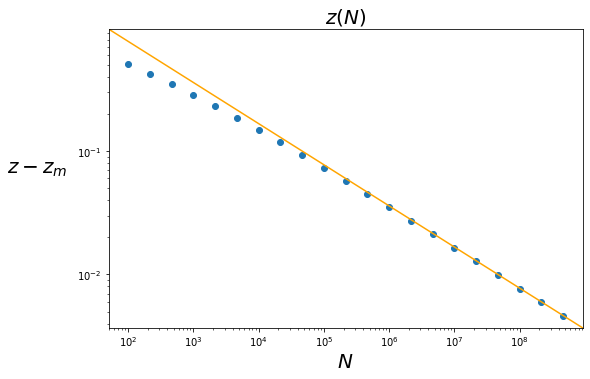

In [16]:
zc = z-zmin

fig,ax = plt.subplots(figsize=(8.5,5.5))

zpredict = zbar*xaxis**(-1/3)

ax.scatter(ns,zc.astype(np.float64))
ax.plot(xaxis,zpredict,color='orange')
ax.set_yscale('log')
ax.set_xscale('log')

ax.set_xlabel(r'$N$',size=20)
ax.set_ylabel(r'$z - z_m$            ',size=20,rotation=0)

ax.set_xlim(float(xaxis[0]), float(xaxis[-1]))
ax.set_ylim(float(zpredict[-1]), float(zpredict[0]))

ax.set_title(r'$z(N)$'.format(eta), fontsize=20)
plt.savefig('scaling_z.png'.format(eta), bbox_inches = "tight",dpi=600)

plt.show()